### Digit Recognition 1
We would be creating a deep learning network using only a single hidden layer. The digit database is from MNIST. 
![](img/model_dnn.png)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28


The training dataset is structured as a 3-dimensional array of instance, image width and image height.
### Question ###
1. What does the three numbers from the shape output mean?

### Answer
The first number 60000 represent Number of training data, the first number means number of data  
The next 2 numbers mean that each picture is 28 pixels x 28 pixels,The number of pixels on the x-axis and y-axis, respectively

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

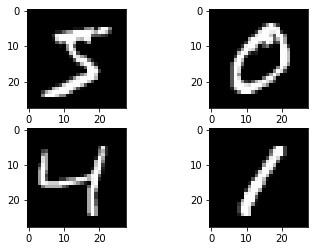

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Question ###
1. Why is the shape 784? Why do we need this size?

### Answer
Because an image has 28 pixels*28 pixels, there are 28*28=764 neurons in total   
Convert the original 28×28 2-dimensional digital image into a 1-dimensional vector  


In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows* img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows* img_cols)
input_shape = (img_rows* img_cols)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #reduce to 0-1
x_test /= 255  #reduce to 0-1
print('input shape',input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input shape 784
x_train shape: (60000, 784)
60000 train samples
10000 test samples


The output variable is an integer from 0 to 9. This is a multi-class classification problem. We need to use one hot encoding of the class values to use the categorical cross entropy loss function. We transformi the vector of class integers into a binary matrix, e.g. class 1 becomes 0100000000, class 2 00100000000.

In [ ]:
# convert class vectors to binary class matrices 
# do not re-run this cell without reloading data!!

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(num_classes)

10


After creating the input train and test data, we create the neural network model. This is a simple 1 hidden layer network. 

In [ ]:
model=Sequential()

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer. A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction

In [ ]:
#input layer + hidden layer 1
model.add(Dense(units=img_rows*img_cols, activation='relu', input_dim=784))
#output layer
model.add(Dense(units=num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


### Question ###
1. What does the Param in the model summary indicates?

### Answer
 Param means the number of neuron weights in each layer  

Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

After creating the model, we train the training.

In [ ]:
history=model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1932 - accuracy: 0.9423
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0754 - accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0496 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0256 - accuracy: 0.9916


Finally we print the error rate using training data

In [ ]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print(model.metrics_names[0], scores[0])
print(model.metrics_names[1], scores[1])

313/313 - 1s - loss: 0.0976 - accuracy: 0.9727 - 1s/epoch - 3ms/step
Baseline Error: 2.73%
loss 0.0975736603140831
accuracy 0.9726999998092651


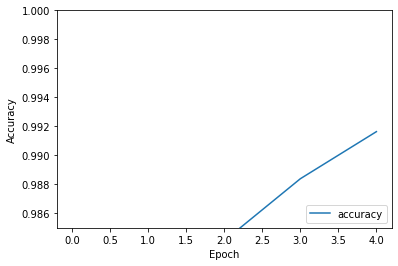

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.985, 1])
plt.legend(loc='lower right')

### Check in the individual predictions

In [ ]:
from numpy import argmax, expand_dims
import numpy
#check individual prediction 
y = expand_dims(x_test[0], axis=0)
result=numpy.argmax(model.predict(y))
print(result)
y = expand_dims(x_test[1], axis=0)
result=numpy.argmax(model.predict(y))
print(result)
y = expand_dims(x_test[2], axis=0)
result=numpy.argmax(model.predict(y))
print(result)
y = expand_dims(x_test[3], axis=0)
result=numpy.argmax(model.predict(y))
print(result)

7
2
1
0


### Question ###
1. Experiment with more layers and see if the results differ significantly

### Answer
Add 2 hidden layers to model.
The accuracy of the test data increase from 0.9727 to 0.9777, and the performance of the model be better.

In [ ]:
model2=Sequential()

#input layer + hidden layer 1
model2.add(Dense(units=img_rows*img_cols, activation='relu', input_dim=784))

#hidden layer 2
model2.add(Dense(units=img_rows*img_cols, activation='relu'))

#hidden layer 3
model2.add(Dense(units=img_rows*img_cols, activation='relu'))

#output layer
model2.add(Dense(units=num_classes, activation='softmax'))
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,854,170
Trainable params: 1,854,170
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model2.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1943 - accuracy: 0.9416
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0981 - accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0684 - accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0545 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0477 - accuracy: 0.9860


In [ ]:
# Final evaluation of the model
scores = model2.evaluate(x_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print(model2.metrics_names[0], scores[0])
print(model2.metrics_names[1], scores[1])

313/313 - 2s - loss: 0.0914 - accuracy: 0.9777 - 2s/epoch - 7ms/step
Baseline Error: 2.23%
loss 0.09139908850193024
accuracy 0.9776999950408936


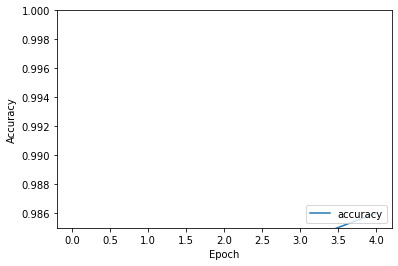

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.985, 1])
plt.legend(loc='lower right')